# Titanic Model

## 1.Data import and readability

In [150]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline

In [151]:
#importing and reading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [152]:
#Display data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see that the column "survived" will be the dependent feature and is missing in the training data.  

In [154]:
#Check the shape of our dataframe
train.shape

(891, 12)

In [155]:
test.shape

(418, 11)

In [156]:
#Check the data types of the data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [158]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

I'll use a heatmap to visualize the missing values in our dataset. 

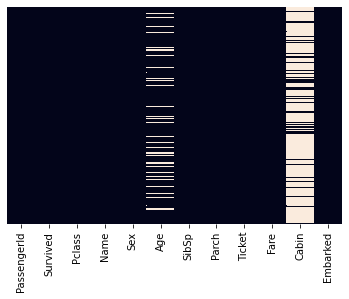

In [160]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

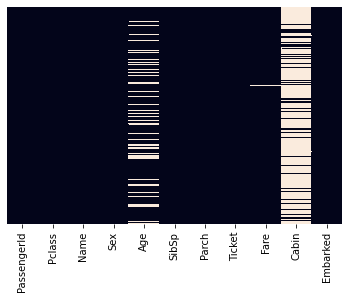

In [161]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

The heatmaps display the missing values on each feature in our data set and helps us clean the data better. 

## 2.Exploratory Data Analysis

Lets separate numerical features from categorical features. 

In [162]:
cat_features = [ft for ft in train.columns if train[ft].dtypes == 'object']
cat_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [163]:
num_features =  [ft for ft in train.columns if train[ft].dtypes != 'object']
num_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Lets try to find a correlation between some of the feature by visualizing the survival rates in respect to some features. 

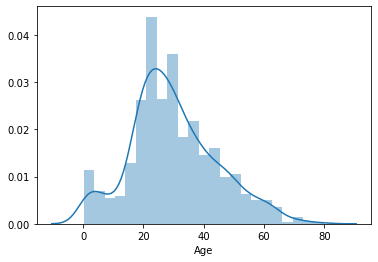

In [204]:
#Age frequency in the boat
sns.distplot(data.Age)

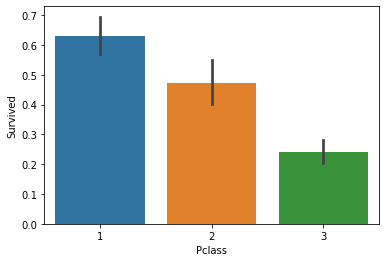

In [164]:
#Passenger class in relation to survival rate
sns.barplot(x='Pclass',y='Survived', data=train)

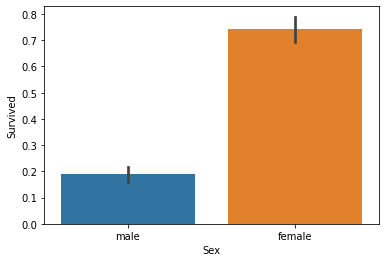

In [165]:
#gender of passenger in relation to survival rate
sns.barplot(x='Sex', y='Survived', data=train)

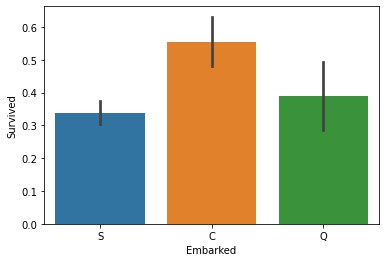

In [166]:
#Port of embarkment in relation with survival rate
sns.barplot(x='Embarked',y='Survived', data=train)

We can see that the following relations are true:
    - People from first class had a higher probability of survival. 
    - People that embarked from 'C' had a higher probability of survival.
    - If you were a woman you had higher chances to survive. 

**Lets proceed and separate the dependent variable as well as merging our data**

In [167]:
#Separates the dependent variable from the dataset. 
y_train = train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [168]:
data = pd.concat([train,test]).reset_index(drop=True)
data.drop(['Survived'], axis=1, inplace=True)
print("The shape of the new dataframe is: {}".format(data.shape))

The shape of the new dataframe is: (1309, 11)


In [169]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## 3. Feature Engineering

We are going to evaluate each feature to solve each one of the following issues:
    - Address missing values in the data.
    - Get rid of features that do not provide any useful information. 
    - Combine or separate any features into new columnds which would facilitate the way we read the data.  

In [211]:
#Group by Sex and Passenger Class and obtain the median age of each.
age_by_pclass = data.groupby(['Sex','Pclass'])['Age'].median()
for gender in ['female', 'male']:
    for pclass in range(1,4):
        print("The median age for {} in {}'s class is: {}".format(gender, pclass, age_by_pclass[gender][pclass]))
print("The median age of all passengers is: {}".format(data.Age.median()))

The median age for female in 1's class is: 36.0
The median age for female in 2's class is: 28.0
The median age for female in 3's class is: 22.0
The median age for male in 1's class is: 42.0
The median age for male in 2's class is: 29.5
The median age for male in 3's class is: 25.0
The median age of all passengers is: 28.0


In [216]:
#Replace the missing values in the 'Age' column.
data['Age'] = data.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
data['Age'].isnull().sum()

0

In [225]:
#We replace the null values in Embarked with its mode.
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())
data['Embarked'].isnull().sum()

0

In [ ]:
#We are going to drop the cabin feature due to its high amount of missing values. 
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
#We are going to combine the SibSp feature and the Parch feature into a single new feature: "FamSize"
data['FamSize'] = data.SibSp + data.Parch + 1

#We procede to get rid of the other two features.
data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

data.head()